# Selección de Características y Reducción de dimensionalidad

## Pasos generales

1. Carga de datos desde un dataset (de Kaggle)
2. Exploración de los datos (dimensiones, valores faltantes, distribución)
3. Feature Selection (métodos basados en estadísticas y modelos)
4. Dimensionality Reduction (PCA y t-SNE)
5. Visualización de resultados


In [ ]:
# Feature Selection & Dimensionality Reduction en Python

# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# 📌 1. Cargar dataset de Kaggle

In [52]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

# 📌 2. Exploración rápida del dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


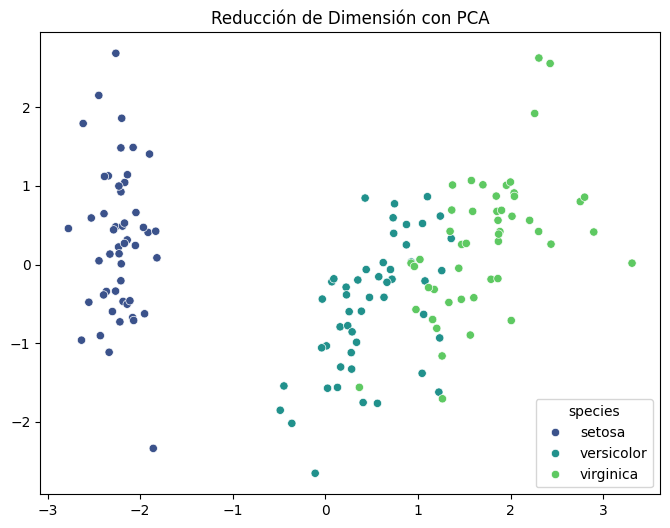

In [53]:
# Componentes del dataset original
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización de PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="viridis")
plt.title("Reducción de Dimensión con PCA")
plt.show()

## Convertir variables categóricas si existen

` pd.get_dummies` hace codificación `one-hot`.

 Crea nuevas columnas para representar las variables categóricas.


In [54]:
if df.select_dtypes(include=['object']).shape[1] > 0: # shape[1] devuelve el numero de columnas
    #df_dummies = pd.get_dummies(df, drop_first=False)
    df = pd.get_dummies(df, drop_first=True)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,False,False
1,4.9,3.0,1.4,0.2,False,False
2,4.7,3.2,1.3,0.2,False,False
3,4.6,3.1,1.5,0.2,False,False
4,5.0,3.6,1.4,0.2,False,False


In [40]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_versicolor', 'species_virginica'],
      dtype='object')

## Separar variables predictoras y la variable objetivo

In [56]:
X = df.drop(columns=["species_virginica"])  # Variable objetivo (cambia según dataset)
y = df["species_virginica"]

In [61]:
X = df.drop(columns=["species_versicolor"])  # Variable objetivo (cambia según dataset)
y = df["species_versicolor"]

## Estandarizar los datos

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 3. Feature Selection con ANOVA F-test

In [63]:
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X_scaled, y)
print("Características seleccionadas:", X.columns[selector.get_support()])

Características seleccionadas: Index(['sepal_width', 'species_virginica'], dtype='object')


# 📌 4. Reducción de Dimensionalidad con PCA

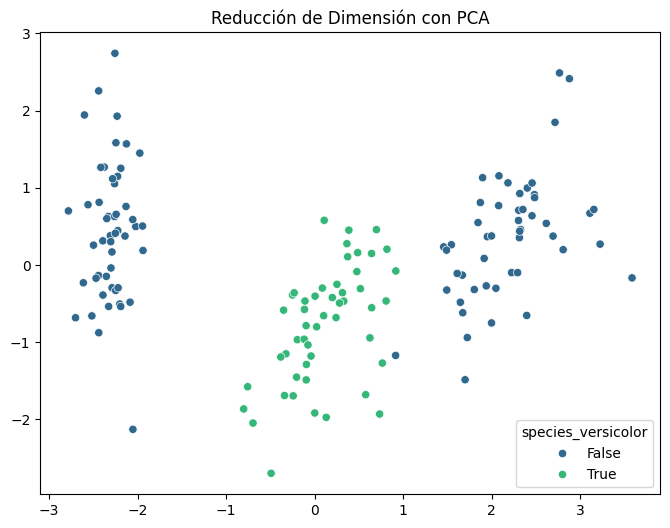

In [64]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización de PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="viridis")
plt.title("Reducción de Dimensión con PCA")
plt.show()

# 📌 5. Reducción con t-SNE

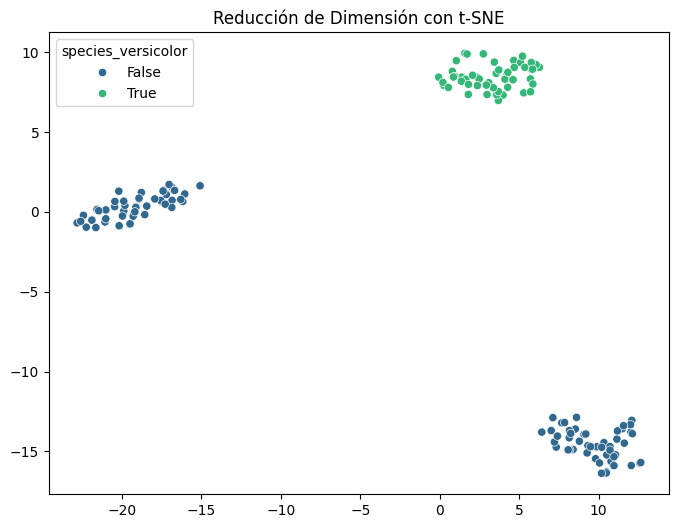

In [65]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualización de t-SNE
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette="viridis")
plt.title("Reducción de Dimensión con t-SNE")
plt.show()

Este código hace *Selección de Características* con `SelectKBest` y *Reducción de dimensionalidad* con `PCA` y `t-SNE`, mostrando gráficos para visualizar los resultados.